# Tutorial 3 : NYC Flights

### Name :

In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

## 1. Read Data

In [4]:
# Read data 'nyc_flights.csv'
df = pd.read_csv('./nyc_flights.csv')
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


Q: how many rows in this dataset?

In [5]:
len(df)

336776

# Data Dictionary

1. year - Year of Flight
2. month - Month of Flight
3. day - Day (number of Flight)
4. dep_time - Departure Time
5. sched_dep_time - Scheduled Departure Time
6. dep_delay - Departure Delay (in Minutes)
7. arr_time - Arrival Time
8. sched_arr_time - Scheduled Arrival Time
9. arr_delay - Arrival Delay (in Minutes)
10. carrier- Carrier Details of Flight
11. flight - Flight Name
12. tailnum - Tailnumber of Flight
13. origin - Origin of Flight
14. dest - Destination Airport Name
15. air_time - Air Time (Time in Air - travel Time ( in minutes) )
16. distance - Distance (assuming in miles?)
17. hour - Hour
18. minute - minute
19. time_hour - time hour

Q; In practice, how would you find details of your dataset as you see the data dictionary above? 

(ANS) 

Q: how many airports in NYC ? Name them from the dataset (you can google it, too)

(ANS)

## 2. Check missing values

In [6]:
# check missing values in all columns
df.isnull().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

Q: Which column has the largest percentage of missing values relative to the total number of its rows?

(ANS)

In [9]:
#Drop Null Values
df.dropna(axis=0, how = 'any', inplace = True)

#Drop the columns that i dont need for my analysis to reduce the processing time/power
df.drop(axis=1, columns = ['time_hour'], inplace=True)

* Comments : there are other ways to deal with missing values such that you can 'impute' null/missing values with aveage or previous values  (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)


In [8]:
# Check whether your dataset has actually dropped some rows from the original one.
len(df)

327346

In [10]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0


## 3. Getting an interaction chart

### Hint 
    1) Please be aware that the interaction chart requires exclusively numerical columns.
    2) Use seaborn and sns.heatmap (https://seaborn.pydata.org/generated/seaborn.heatmap.html)


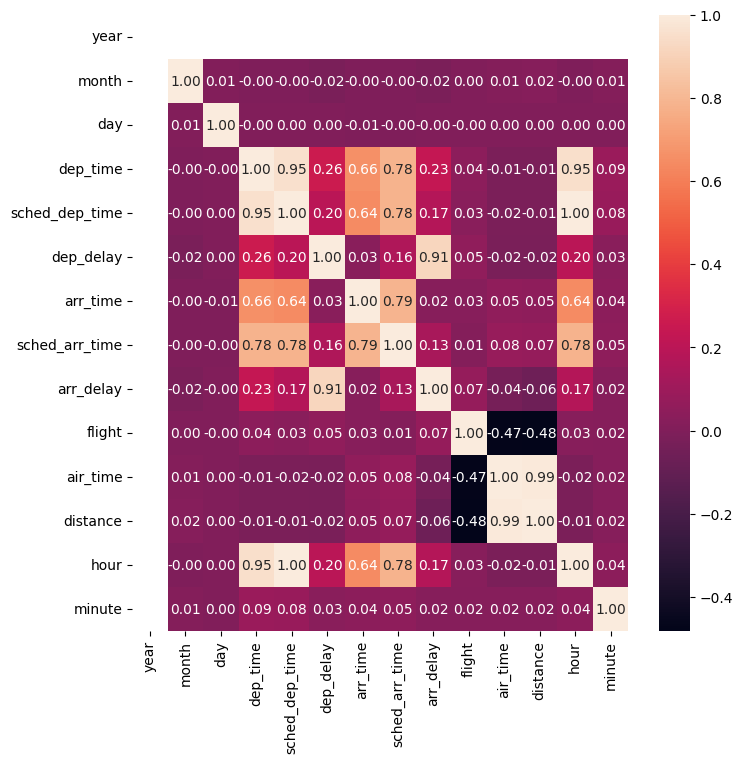

In [20]:
import seaborn as sns

# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical data
correlation_matrix = numerical_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f")
plt.show()



Q : what columns have high interactions ?

(ANS)

## 4. EDA using Profiling Report

You can do EDA all at once with ProfilingReport!

In [12]:
!pip install ydata_profiling

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 16.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [21]:
from ydata_profiling import ProfileReport

In [22]:
# Profiling : https://docs.profiling.ydata.ai/latest/
profile = ProfileReport(df)

profile.to_file("your_report.html")



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Q: Does this result have the same result from what you have done above? 

(ANS)

## 5. Visualize the comparison of flight volumes departing from EWR, JFK, and LGA

Ref: airport code (https://www.world-airport-codes.com/us-top-40-airports.html)


<Axes: xlabel='origin', ylabel='year'>

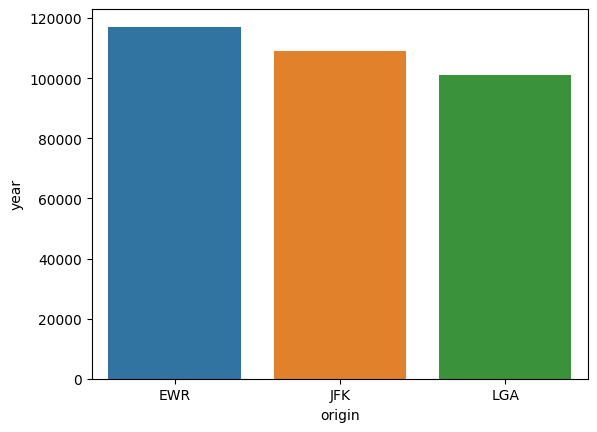

In [27]:
import seaborn as sns

# use groupby
dt = df.groupby(by='origin').count().reset_index()
sns.barplot(x = 'origin', y= 'year', data=dt, hue = 'origin')

Q: Explain why you chose the chart above and what airport has highest number of flights taking off from ?

(ANS)

## 6. Average Departure delay from airports

In [33]:
numerical_df = df.select_dtypes(include = ['number'])
grouped_df = numerical_df.groupby(by=df['origin']).mean().reset_index()
grouped_df

,origin,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
0,EWR,2013.0,6.510634,15.729738,1336.262168,1317.757707,15.009110,1491.716854,1523.641159,9.107055,2341.120425,153.300025,1064.752166,12.905573,27.200449
1,JFK,2013.0,6.513738,15.761411,1398.266642,1398.830609,12.023607,1520.118721,1562.134233,5.551481,1341.772779,178.349050,1275.210590,13.713400,27.490571
2,LGA,2013.0,6.682608,15.731461,1309.937384,1303.394127,10.286583,1494.070635,1511.732272,5.783488,2130.708335,117.825806,784.756110,12.796342,23.759956


<Axes: xlabel='origin', ylabel='dep_delay'>

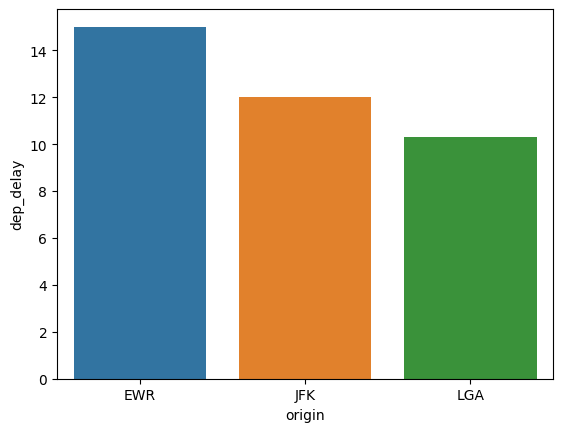

In [34]:
sns.barplot(x='origin', y = 'dep_delay', data = grouped_df, hue = 'origin')

what airport has highest departure delay ? Any relationship with 'No. 5's results? 

(ANS)

## 7. Visualize Flight Carrier Frequency

In [35]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0


<Axes: xlabel='carrier', ylabel='count'>

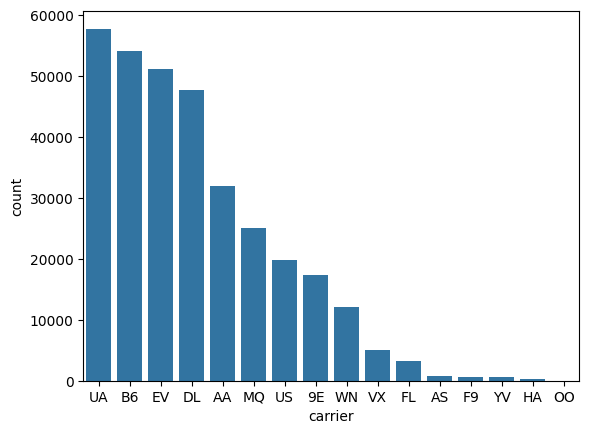

In [37]:
# Count the frequency of each carrier
carrier_counts = df['carrier'].value_counts()
sns.barplot(data=carrier_counts)
# Create bar chart


Q: what are the top3 frequent flight carrers?

(ANS)

## 7. Scatter plot for Departure delay vs arrival delay

Text(0, 0.5, 'arrival delay')

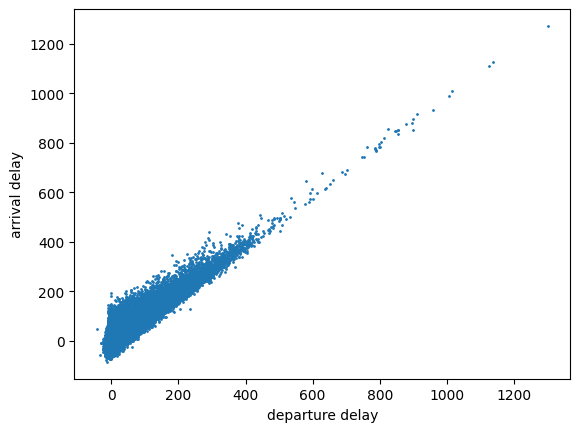

In [40]:
plt.scatter(df['dep_delay'], df['arr_delay'], s =1)
plt.xlabel('departure delay')
plt.ylabel('arrival delay')

do you find anything suspicious from the dataset? 

(ANS) 

In [43]:
df[df['dep_delay'] > 0].sort_values(by= 'dep_delay')


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute
216987,2013,5,26,1431.0,1430,1.0,1817.0,1845,-28.0,AA,1635,N5FHAA,JFK,SJU,194.0,1598,14,30
58182,2013,11,3,1656.0,1655,1.0,2021.0,2015,6.0,VX,413,N630VA,JFK,LAX,355.0,2475,16,55
96484,2013,12,15,1516.0,1515,1.0,1708.0,1705,3.0,MQ,3231,N928MQ,JFK,PIT,68.0,340,15,15
263861,2013,7,15,1316.0,1315,1.0,1539.0,1607,-28.0,UA,1130,N17105,EWR,LAX,294.0,2454,13,15
312555,2013,9,4,1800.0,1759,1.0,1915.0,1938,-23.0,UA,691,N487UA,LGA,ORD,107.0,733,17,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270376,2013,7,22,845.0,1600,1005.0,1044.0,1815,989.0,MQ,3075,N665MQ,JFK,CVG,96.0,589,16,0
327043,2013,9,20,1139.0,1845,1014.0,1457.0,2210,1007.0,AA,177,N338AA,JFK,SFO,354.0,2586,18,45
8239,2013,1,10,1121.0,1635,1126.0,1239.0,1810,1109.0,MQ,3695,N517MQ,EWR,ORD,111.0,719,16,35
235778,2013,6,15,1432.0,1935,1137.0,1607.0,2120,1127.0,MQ,3535,N504MQ,JFK,CMH,74.0,483,19,35


## 8. On Time Arrival Performance of Airports

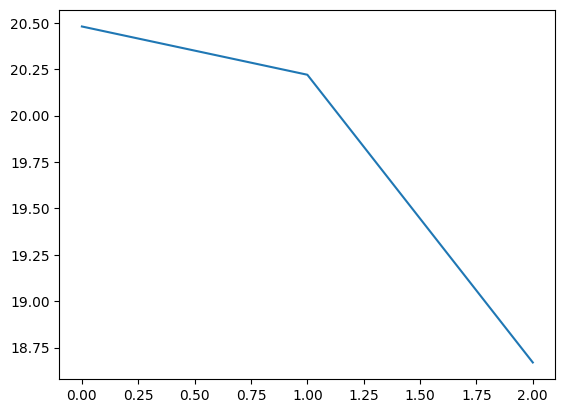

In [48]:
# Count rows of arrival on time grouped by airports

ota = df[df['arr_delay'] <= 0].groupby("origin").count().reset_index()

otaresult = np.round((ota['day']/df['month'].count())*100, decimals = 2)
plt.plot(otaresult)

Q: Share your insights from ten steps above

(ANS)